In [11]:
# Homework 6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Get sklearn! https://scikit-learn.org/stable/
from sklearn import linear_model

In [12]:
filename = "LA_AQS_2023.csv" 
pd.read_csv(filename)
df = pd.read_csv(filename) 

[Text(0.5, 0, 'NO2 (ppb)'), Text(0, 0.5, 'Ozone (ppb)')]

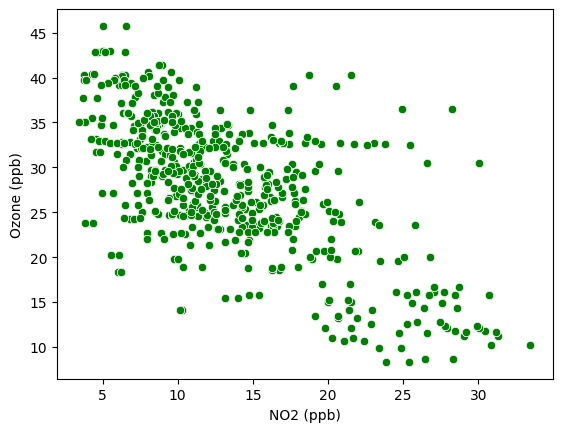

In [13]:
# Get data
df_o3 = df[(df['Parameter Name']== 'Ozone') & (df['Duration Description']== '1 HOUR')]
o3value = df_o3['Arithmetic Mean'] * 1000 #ppb
o3date = df_o3['Date (Local)']
df_1 = pd.DataFrame(data = {'Ozone':o3value, 'date': o3date})

df_no2 = df[(df['Parameter Name']== 'Nitrogen dioxide (NO2)') & (df['Duration Description']== '1 HOUR')]
no2value = df_no2['Arithmetic Mean'] # ppb
no2date = df_no2['Date (Local)']
df_2 = pd.DataFrame(data = {'Nitrogen Dioxide (NO2)':no2value, 'date': no2date})

# Merge Data
df_all = df_1.merge(df_2,on=['date'])

# Scatter Plot
sPlot = sns.scatterplot(data = df_all, x = 'Nitrogen Dioxide (NO2)', y = 'Ozone', color = 'green')
sPlot.set(xlabel ="NO2 (ppb)", ylabel = "Ozone (ppb)")

In [14]:
# z =(df_all["Nitrogen Dioxide (NO2)"])[np.arange(1,(len((df_all["Nitrogen Dioxide (NO2)"])))+1,1)]
z =df_all["Nitrogen Dioxide (NO2)"]
xVal = np.array(z).reshape((-1, 1))
yVal = np.array(df_all["Ozone"])
reg = linear_model.LinearRegression()


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xVal, yVal, test_size=0.20)
reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)
print("Coefficients: \n", reg2.coef_)
print("Intercept: \n", reg2.intercept_)

Coefficients: 
 [-0.79830661]
Intercept: 
 38.52601395611356


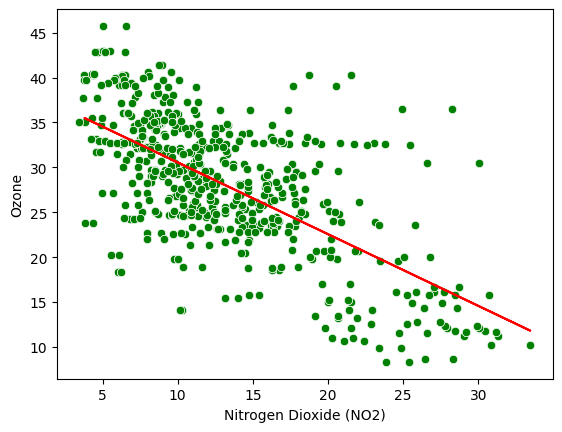

In [17]:
#Plot Test Data
df_test = pd.DataFrame({'Nitrogen Dioxide (NO2)' : X_test.ravel(), 'Ozone' : y_test.ravel()})
df_test['yPred'] = reg2.predict(X_test)
sns.scatterplot(data=df_all, x = 'Nitrogen Dioxide (NO2)', y = 'Ozone',color = 'green')
plt.plot(df_test['Nitrogen Dioxide (NO2)'], df_test['yPred'], color='r')

In [ ]:
# The linear regression fits reasonably well although the data analysis would most likely benefit from having two linear regressions (greater than 20ppb NO2 and less than) 
# since many data points above 20ppb NO2 tend to fall below the linear regression.

In [18]:
from sklearn.metrics import mean_squared_error
print('Test MSE is', round(mean_squared_error(df_test['Ozone'],df_test['yPred']),3), 'ppb')


Test MSE is 32.384 ppb


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Monthly Average [CO2] (ppm)')]

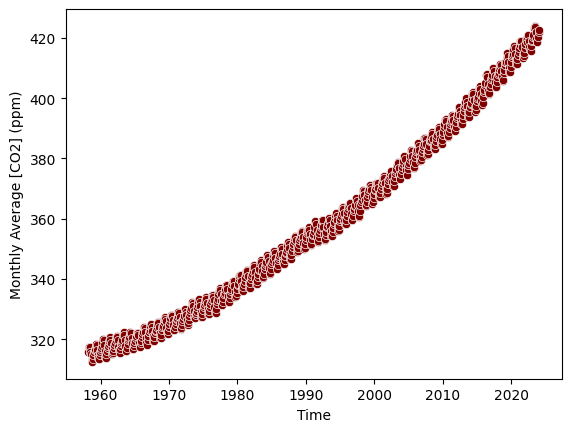

In [19]:
# Read in Mauna Loa csv
filename = "ManuaLoa_CO2.csv" 
pd.read_csv(filename)
df = pd.read_csv(filename)
df.head()

# Scatter Plot
cPlot = sns.scatterplot(data = df, x ='decimal date', y = 'average', color = 'maroon')
cPlot.set(xlabel = 'Time', ylabel = 'Monthly Average [CO2] (ppm)')

In [20]:
# Test Data is older than 2000
o  = df[df['decimal date'] < 2000]

# Test Data is newer than 2000
n  = df[df['decimal date'] >= 2000]

In [21]:

xo = o['decimal date'] #Older than 2000
yo = o['average'] #CO2 conc.

xn = n['decimal date'] #Newer than 2000
yn = n['average'] #CO2 conc.


xValo = np.array(xo).reshape((-1, 1))
yValo = np.array(yo)

xValn = np.array(xn).reshape((-1, 1))
yValn = np.array(yn)



/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_24550/1181950822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o['yPredo'] = yPredo
/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_24550/1181950822.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['yPredn'] = yPredn


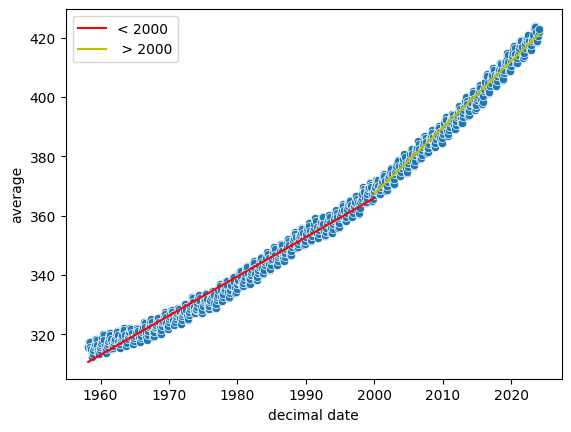

In [22]:

reg = linear_model.LinearRegression()
reg.fit(xValo,yValo)
yPredo = reg.predict(xValo)
o['yPredo'] = yPredo
sns.scatterplot(data=df, x='decimal date', y='average')
f = plt.plot(o['decimal date'], o['yPredo'], color='r', label = '< 2000')

reg = linear_model.LinearRegression()
reg.fit(xValn,yValn)
yPredn = reg.predict(xValn)
n['yPredn'] = yPredn
h = plt.plot(n['decimal date'], n['yPredn'], color='y', label = " > 2000")
plt.legend()


In [ ]:
# The first linear regression fits reasonably well, though the trend appears to look more exponential than linear thus a linear regression may not be very descriptive of the trend. The
# second regression fits the data nicely because as many data points that are above the regression are below the regression line.